<a href="https://colab.research.google.com/github/Praviniitm/Project_Moscow/blob/main/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [14]:
Users_df= pd.read_csv('/content/sample_data/users.csv')

In [15]:
Repositories_df= pd.read_csv('/content/sample_data/repositories.csv')

1. Who are the top 5 users in Moscow with the highest number of followers? List their login in order, comma-separated.
Users

2. Who are the 5 earliest registered GitHub users in Moscow? List their login in ascending order of created_at, comma-separated.
Users

In [ ]:
moscow_users = Users_df

# 1. Top 5 users in Moscow by followers
top_5_moscow_users = moscow_users.nlargest(5, 'followers')[['login']]
top_5_logins = ",".join(top_5_moscow_users['login'])
print("Top 5 users in Moscow by followers:", top_5_logins)

# 2. 5 earliest registered users in Moscow by created_at
earliest_5_moscow_users = moscow_users.sort_values(by='created_at').head(5)[['login']]
earliest_5_logins = ",".join(earliest_5_moscow_users['login'])
print("5 earliest registered users in Moscow:", earliest_5_logins)

Top 5 users in Moscow by followers: AlexGyver,carlcastanas,sergeyshaykhullin,alexey-goloburdin,richardroberti
5 earliest registered users in Moscow: maxlapshin,veged,alexeyr,alec-c4,alno


3. What are the 3 most popular license among these users? Ignore missing licenses. List the license_name in order, comma-separated.

In [ ]:
filtered_df = Repositories_df.dropna(subset=['license_name'])

# Count occurrences of each license and select the top 3
top_licenses = (
    filtered_df['license_name']
    .value_counts()
    .nlargest(3)
    .index.tolist()
)

# Format the result as a comma-separated string
result = ",".join(top_licenses)
print("Top 3 most popular licenses:", result)

Top 3 most popular licenses: mit,other,apache-2.0


4. Which company do the majority of these developers work at?
Company (cleaned up as explained above)

In [ ]:
# Drop rows with missing values in the 'company' column
filtered_df = Users_df.dropna(subset=['company'])

# Count occurrences of each company and find the one with the maximum count
top_company = filtered_df['company'].value_counts().idxmax()
top_count = filtered_df['company'].value_counts().max()

print(f"The company with the most people working is: {top_company} with {top_count} employees.")

The company with the most people working is: YANDEX with 22 employees.


5. Which programming language is most popular among these users?
Language

In [ ]:
# Drop rows with missing values in the 'language' column
filtered_df2 = Repositories_df.dropna(subset=['language'])

# Count occurrences of each programming language and find the one with the maximum count
most_used_language = filtered_df2['language'].value_counts().idxmax()
most_used_count = filtered_df2['language'].value_counts().max()

print(f"The most used programming language is: {most_used_language} with {most_used_count} repositories.")

The most used programming language is: JavaScript with 2968 repositories.


6. Which programming language is the second most popular among users who joined after 2020?
Language

In [ ]:
Users_df['created_at'] = pd.to_datetime(Users_df['created_at'])  # Ensure 'created_at' is in datetime format
recent_users = Users_df[Users_df['created_at'] > '2020-01-01']

# Step 2: Retrieve the logins of those users
recent_logins = recent_users['login'].tolist()

# Step 3: Filter repositories_df for those logins
filtered_repos3 = Repositories_df[Repositories_df['login'].isin(recent_logins)]

# Step 4: Count the occurrences of each language
language_counts = filtered_repos3['language'].value_counts()

# Step 5: Identify the second most used language
if len(language_counts) > 1:
    second_most_used_language = language_counts.index[1]  # Get the second most common language
else:
    second_most_used_language = None  # Handle the case where there are not enough languages

print("Second most used programming language:", second_most_used_language)

Second most used programming language: Python


7. Which language has the highest average number of stars per repository?
Language

In [ ]:
average_stars_per_language = Repositories_df.groupby('language')['stargazers_count'].mean()

# Step 2: Identify the language with the highest average
highest_average_language = average_stars_per_language.idxmax()
highest_average_stars = average_stars_per_language.max()

print(f"Language with the highest average stars per repository: {highest_average_language} with an average of {highest_average_stars:.2f} stars.")

Language with the highest average stars per repository: Pascal with an average of 501.94 stars.


8. Let's define leader_strength as followers / (1 + following). Who are the top 5 in terms of leader_strength? List their login in order, comma-separated.
User login

In [ ]:
Users_df['LeaderStregth']=Users_df['followers']/(1+Users_df['following'])

In [ ]:
Leaders=Users_df.sort_values(by='LeaderStregth',ascending=False).head(5)['login']
result = ",".join(Leaders)
print("Top 5 leaders:", result)


Top 5 leaders: AlexGyver,alexey-goloburdin,yandex,yandexdataschool,esokolov


9. What is the correlation between the number of followers and the number of public repositories among users in Moscow?
Correlation between followers and repos (to 3 decimal places, e.g. 0.123 or -0.123)

In [ ]:
correlation = Users_df['followers'].corr(Users_df['public_repos'])
print("Correlation between followers and public repositories:", correlation)


Correlation between followers and public repositories: 0.05121092889817158


10. Does creating more repos help users get more followers? Using regression, estimate how many additional followers a user gets per additional public repository.
Regression slope of followers on repos (to 3 decimal places, e.g. 0.123 or -0.123)

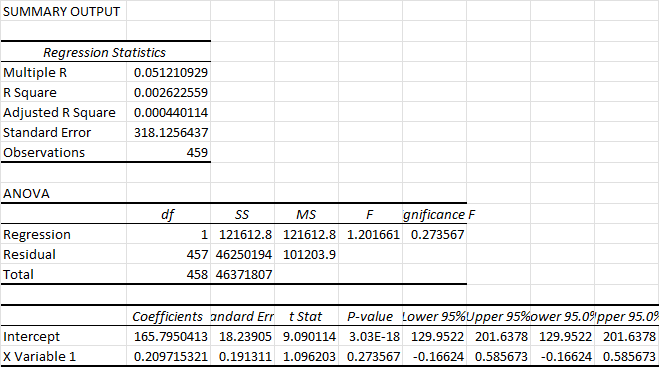

11. Do people typically enable projects and wikis together? What is the correlation between a repo having projects enabled and having wiki enabled?
Correlation between projects and wiki enabled (to 3 decimal places, e.g. 0.123 or -0.123)

In [ ]:
if 'has_projects' in Repositories_df.columns and 'has_wiki' in Repositories_df.columns:
    # Step 2: Calculate the correlation
    correlation = Repositories_df['has_projects'].corr(Repositories_df['has_wiki'])
    print(f"Correlation between enabling projects and wikis: {correlation:.2f}")
else:
    print("Required columns not found in the DataFrame.")

Correlation between enabling projects and wikis: 0.35


12. Do hireable users follow more people than those who are not hireable?
Average of following per user for hireable=true minus the average following for the rest (to 3 decimal places, e.g. 12.345 or -12.345)

In [19]:
hireable_avg_following = Users_df[Users_df['hireable'] == True]['following'].mean()
non_hireable_avg_following = Users_df[Users_df['hireable'] != True]['following'].mean()
difference = hireable_avg_following - non_hireable_avg_following
difference

-29.39637198622274

13. Some developers write long bios. Does that help them get more followers? What's the impact of the length of their bio (in Unicode words, split by whitespace) with followers? (Ignore people without bios)
Regression slope of followers on bio word count (to 3 decimal places, e.g. 12.345 or -12.345)

In [ ]:
import statsmodels.api as sm

df = Users_df[Users_df['bio'].notnull()]

# Calculate the length of each bio in words
df['bio_word_count'] = df['bio'].str.split().str.len()

# Prepare the independent variable (X) and dependent variable (y)
X = df['bio_word_count']
y = df['followers'] # Adjust the column name as per your dataset

# Add a constant to the independent variable (for the intercept)
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Get the slope (coefficient of the bio_word_count)
slope = model.params['bio_word_count']

# Print the regression slope rounded to three decimal places
print(f"\nRegression slope of followers on bio word count: {slope:.3f}")


Regression slope of followers on bio word count: 0.519


<ipython-input-40-b48dfc60676e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bio_word_count'] = df['bio'].str.split().str.len()


14. Who created the most repositories on weekends (UTC)? List the top 5 users' login in order, comma-separated
Users login

In [ ]:
# Step 1: Convert the created_at column to datetime format
Repositories_df['created_at'] = pd.to_datetime(Repositories_df['created_at'])

# Step 2: Filter for weekend days (Saturday=5, Sunday=6)
weekend_repos_df = Repositories_df[Repositories_df['created_at'].dt.dayofweek >= 5]

# Step 3: Group by login and count the number of repositories created
top_weekend_creators = weekend_repos_df.groupby('login').size().reset_index(name='repo_count')

# Step 4: Sort the results and get the top 5 users
top_5_users = top_weekend_creators.sort_values(by='repo_count', ascending=False).head(5)

# Get the logins as a comma-separated string
top_5_logins = ','.join(top_5_users['login'])

print(f"Top 5 users who created the most repositories on weekends: {top_5_logins}")

Top 5 users who created the most repositories on weekends: VN0,kuggaa,reverse-ex,Mirocow,vslinko


15. Do people who are hireable share their email addresses more often?
[fraction of users with email when hireable=true] minus [fraction of users with email for the rest] (to 3 decimal places, e.g. 0.123 or -0.123)

In [17]:
fraction_hierable = Users_df[Users_df['hireable'] == True]['email'].notna().mean()
fraction_non_hierable = Users_df[Users_df['hireable'] != True]['email'].notna().mean()
diff = fraction_hierable - fraction_non_hierable
diff

0.1885648679678531

In [8]:
difference

nan

In [ ]:
# prompt:  Some developers write long bios. Does that help them get more followers? What's the impact of the length of their bio (in Unicode words, split by whitespace) with followers? (Ignore people without bios)Correlation between bio length and followers: 0.009934530984342313
# <ipython-input-37-bfe83c138310>:7: SettingWithCopyWarning:
# A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
# See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
#   Users_df_with_bio['bio_length'] = Users_df_with_bio['bio'].apply(lambda x: len(str(x).split()))

Users_df_with_bio = Users_df.dropna(subset=['bio'])
Users_df_with_bio['bio_length'] = Users_df_with_bio['bio'].apply(lambda x: len(str(x).split()))

correlation = Users_df_with_bio['followers'].corr(Users_df_with_bio['bio_length'])
print(f"Correlation between bio length and followers: {correlation}")


Correlation between bio length and followers: 0.009934530984342313


<ipython-input-39-b8234c567e91>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Users_df_with_bio['bio_length'] = Users_df_with_bio['bio'].apply(lambda x: len(str(x).split()))


16. Let's assume that the last word in a user's name is their surname (ignore missing names, trim and split by whitespace.) What's the most common surname? (If there's a tie, list them all, comma-separated, alphabetically)
Most common surname(s)

In [ ]:
# prompt: Let's assume that the last word in a user's name is their surname (ignore missing names, trim and split by whitespace.) What's the most common surname? (If there's a tie, list them all, comma-separated, alphabetically)

Users_df['name'] = Users_df['name'].str.strip()
Users_df['surname'] = Users_df['name'].str.split().str[-1]
surname_counts = Users_df['surname'].value_counts()
max_count = surname_counts.max()
most_common_surnames = surname_counts[surname_counts == max_count].index.tolist()
most_common_surnames.sort()
print(','.join(most_common_surnames))

Romanov
